In [1]:
# Just a basic configuration:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import plotly.plotly as py
import plotly.graph_objs as go
# plotly.tools.set_credentials_file(username='rapp.cxs', api_key='55rlfaf8bj')
%matplotlib inline

In [2]:
# check filenames of the data we are exploring:
glob.glob('./adage-data/*.*')

['./adage-data/2016_adage-indies_v2.1.csv',
 './adage-data/adage-2012.csv',
 './adage-data/adage-2014.csv',
 './adage-data/adage-2016.csv',
 './adage-data/test-label.csv']

In [3]:
adage = pd.read_csv('./adage-data/2016_adage-indies_v2.1.csv')
adage.tail(15)

,AGENCY,PARENT,2015 US REVENUE,% CHG
900,BSY Associates,Independent,1000,0.0
901,Hakuhodo*,Hakuhodo DY Holdings,1000,NaN
902,Glyphix,Independent,1000,11.1
903,Munn Rabot,Independent,964,-11.9
904,Mandala,Independent,908,-4.4
905,Fusion B2B,Independent,865,-17.1
906,Media Pros of WNY*,Independent,853,0.0
907,Mighty Fudge Studios,Independent,761,30.1
908,Oster & Associates,Independent,585,-3.9
909,TSA Communications,Independent,510,2.2


<hr>
First thing is to group the Holding companies into 'Big, Small, Independent'

Then: What's the breakdown in total revenue between the big holding companies, smaller holding companies, and the independents?'

In [4]:
# a typing function, to split agencies into 3 types:
def typer(x):
    if x=="Publicis" or \
       x=="WPP" or \
       x=="Interpublic" or \
       x=="Havas" or \
       x=="Omnicom":            
        return 'BIGHOLD'
    elif x=="Independent":        
        return 'INDY'
    else:        
        return 'SMALLHOLD'

In [5]:
revbytype = adage[['PARENT','2015 US REVENUE']]
revbytype.PARENT = revbytype.PARENT.apply(typer)
breakdown = revbytype.groupby('PARENT')

/Users/thomasx/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
# How many agencies in the different types?
breakdown.size()

PARENT
BIGHOLD      200
INDY         634
SMALLHOLD     81
dtype: int64

In [6]:
# What's the total revenue for the different types?
breakdown.sum().sort(columns='2015 US REVENUE')

,2015 US REVENUE
PARENT,
SMALLHOLD,11198654
INDY,12696425
BIGHOLD,22858077


Let's look at that in a nicer graph
#revbytype_plot = breakdown.sum().sort(columns='2015 US REVENUE').plot(kind='bar')
#revbytype_plot.set_title("US Agency Revenue, by type of holding company")
#revbytype_plot.set_xlabel("Type of Holding Company")
#revbytype_plot.set_ylabel("Total revenue, in tens of billions")

In [8]:
labels = [i for i in breakdown.sum().index]
values = [j for j in breakdown.sum()["2015 US REVENUE"]]
trace = go.Pie(labels=labels,values=values)
py.iplot([trace],sharing='private')

<hr>
Good, but want to see how the different types of agencies stack highest in revenue. 

Looking for a revenue point where big agencies eat the smaller agencies...like this:

![Histogram](./imgs/Histogram.png)

Let's start by histograms of the individual parts of dataframes.
<hr>

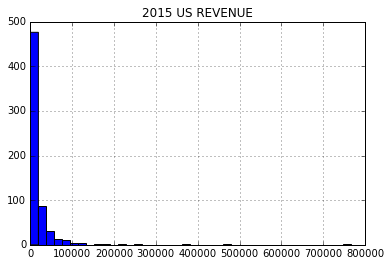

In [9]:
revbytype[revbytype['PARENT']=="INDY"]
indy_plot = revbytype[revbytype['PARENT']=="INDY"].hist(bins=40)

Those smaller agencies are throwing off the distribution, the ones that make less than 10 million. So let's filter down to the revenue size we could reasonably buy (we don't have funds for a billion dollar acquisition).

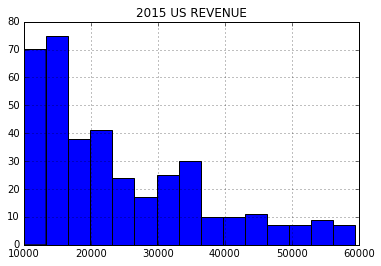

In [16]:
radar = revbytype[(revbytype['2015 US REVENUE'] > 9999) & (revbytype['2015 US REVENUE'] < 59999)]
radar_plot = radar.hist(bins=15)

Looking better; you can start to see inflection points in agency revenue. 

Now filtering by **Independents**—*Assuming they are for sale, versus already held companies*—let's see the distribution of revenue (within our price range).

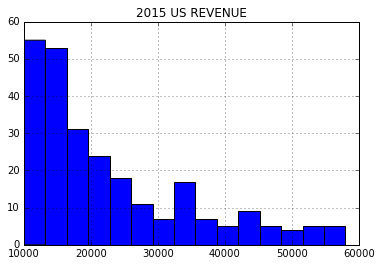

In [15]:
indy_plot = radar[radar['PARENT']=="INDY"].hist(bins=15)